# lab1_1 代码部分


库导入

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pylab as plt
import math

定义插值函数构建

In [2]:
def Linterpolation(ra:np.ndarray,f,x:sp.symbols):
    """
    Linear interpolation.
    :param ra:插值x序列
    :param r:由于是一元表达式，所以只用传入一个一元变量
    :param f:传入函数表达式
    :return:返回一个sympy表达式，后续可以带入实际值运算
    """
    y = 0
    
    n=ra.size
    for k in range(0,n):
        l=1
        for j in range(0,n):
            if j==k:
                continue
            else:
                l=l*(x-ra[j])/(ra[k]-ra[j])
        y=y+l*f(ra[k])
    return y


用平均相对误差来评价差值的准确性

In [3]:
def judge(reals :np.array,evals :np.array):
    """
    判断插值结果是否正确
    :param reals:真实值
    :param evals:插值结果
    :return:
    """
    n=reals.size
    ans=np.zeros(n)
    for i in range(0,n):
        ans[i]=abs((reals[i]-evals[i])/evals[i])

    return np.average(ans)


可视化

## 问题一

### 拉格朗日插值多项式的次数n越大越好吗？

(1)定义f1(x)
$$
f(x) =  \frac{1}{1+x^2}   
$$

In [4]:
def f1(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return 1/(1+x**2);

设置变量和验证数据列

In [5]:

evals = np.array([0.75,1.75,2.75,3.75,4.75])
# result_L=np.zeros(evals.size)
result_R=np.array([i for i in f1(evals)])

根据不同差值次数n得出结果

n= 5
x: 0.75 估计值: 0.528973858173077 真实值: 0.64
x: 1.75 估计值: 0.373324819711538 真实值: 0.24615384615384617
x: 2.75 估计值: 0.153733473557692 真实值: 0.11678832116788321
x: 3.75 估计值: -0.0259540264423077 真实值: 0.06639004149377593
x: 4.75 估计值: -0.0157376802884615 真实值: 0.042440318302387266
平均相对误差: 1.6091144895143192


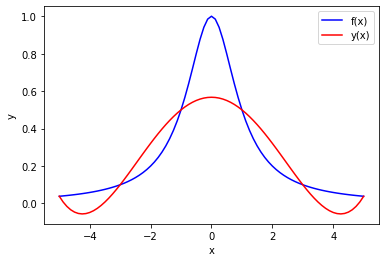

n= 10
x: 0.75 估计值: 0.678989577293396 真实值: 0.64
x: 1.75 估计值: 0.190580466753757 真实值: 0.24615384615384617
x: 2.75 估计值: 0.215591878912568 真实值: 0.11678832116788321
x: 3.75 估计值: -0.231461749896744 真实值: 0.06639004149377593
x: 4.75 估计值: 1.92363114971920 真实值: 0.042440318302387266
平均相对误差: 0.6144160319484996


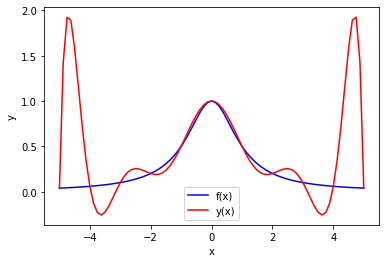

n= 20
x: 0.75 估计值: 0.636755335916433 真实值: 0.64
x: 1.75 估计值: 0.238445933738133 真实值: 0.24615384615384617
x: 2.75 估计值: 0.0806599934216556 真实值: 0.11678832116788321
x: 3.75 估计值: -0.447051960708837 真实值: 0.06639004149377593
x: 4.75 估计值: -39.9524490330416 真实值: 0.042440318302387266
平均相对误差: 0.5269797432824406


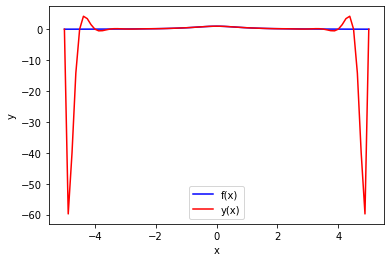

In [6]:
for n in [5,10,20]:
    print("n=",n)
    ra=np.linspace(-5,5,n+1)
    x=sp.symbols('x')
    y=Linterpolation(ra,f1,x)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])
    for i in range(0,evals.size):
        print("x:",evals[i],"估计值:",result_L[i],"真实值:",result_R[i])
    jud=judge(result_R,result_L)
    # print(sp.simplify(y))
    print("平均相对误差:",jud)

    rx = np.linspace(-5, 5, 2*40 + 1)
    ry1 = np.array([f1(i) for i in rx])
    ry2 = np.array([y.evalf(subs={x:i}) for i in rx])
    plt.plot(rx, ry1, 'b-', label='f(x)')
    plt.plot(rx, ry2, 'r-', label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

### 拉格朗日插值多项式的次数n越大越好吗？

(1)定义f2(x)
$$
f(x) =  e^x

$$

In [7]:
def f2(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return np.exp(x)

设置变量和验证数据列

In [8]:

evals = np.array([-0.95,-0.05,0.05,0.95])
# result_L=np.zeros(evals.size)
result_R=np.array([f2(i) for i in evals])

根据不同差值次数n得出结果

n= 5
x: -0.95 估计值: 0.386798158857994 真实值: 0.38674102345450123
x: -0.05 估计值: 0.951248333380447 真实值: 0.951229424500714
x: 0.05 估计值: 1.05129027580848 真实值: 1.0512710963760241
x: 0.95 估计值: 2.58578455098461 真实值: 2.585709659315846
平均相对误差: 5.369956378146956e-05
0.00861541066655919*x**5 + 0.0436498882268756*x**4 + 0.166582869717544*x**3 + 0.499410240406725*x**2 + 1.0000029132597*x + 1.00002050618164
1.00002050618164


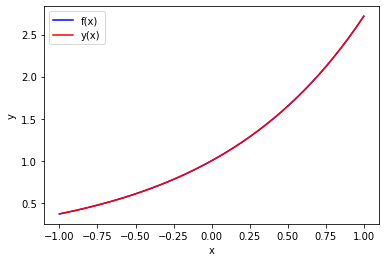

n= 10
x: -0.95 估计值: 3.10941202645984 真实值: 0.38674102345450123
x: -0.05 估计值: 0.951229203689349 真实值: 0.951229424500714
x: 0.05 估计值: 1.05127086536514 真实值: 1.0512710963760241
x: 0.95 估计值: -3.73472336840132 真实值: 2.585709659315846
平均相对误差: 0.6419914828259236
2.80203316549432e-7*x**10 + 2.81136410507088e-6*x**9 + 2.47981352572424e-5*x**8 + 0.000198371189739532*x**7 + 0.0013888899215857*x**6 + 0.00833334575544598*x**5 + 0.0416666665523096*x**4 + 0.166666665295964*x**3 + 0.500000000003148*x**2 + 1.00000000003747*x + 1.0
0


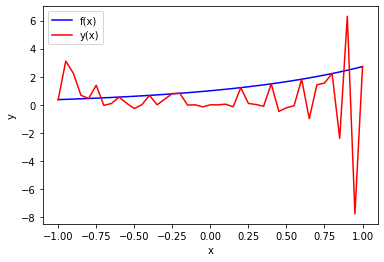

n= 20
x: -0.95 估计值: 0 真实值: 0.38674102345450123
x: -0.05 估计值: 0 真实值: 0.951229424500714
x: 0.05 估计值: 0 真实值: 1.0512710963760241
x: 0.95 估计值: 0 真实值: 2.585709659315846
平均相对误差: inf
-8.13565748103429e-9*x**20 + 4.20595824834891e-9*x**19 - 4.82777977595106e-8*x**18 + 1.19896867545322e-7*x**17 - 5.44203430763446e-7*x**16 + 4.39896211901214e-7*x**15 + 7.50742401578464e-8*x**14 - 1.43386387208011e-7*x**13 + 5.52868414160912e-7*x**12 - 5.67112692806404e-7*x**11 + 6.11651444160088e-7*x**10 + 2.71032416776507e-6*x**9 + 2.48604811972086e-5*x**8 + 0.00019841482450289*x**7 + 0.00138889185378099*x**6 + 0.00833333312242956*x**5 + 0.0416666666805803*x**4 + 0.166666666667044*x**3 + 0.500000000000113*x**2 + 1.00000000000001*x + 1.0
0


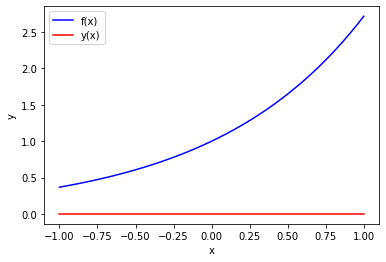

In [10]:
for n in [5,10,20]:
    print("n=",n)
    ra=np.linspace(-1,1,n+1)
    x=sp.symbols('x')
    y=Linterpolation(ra,f2,x)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])
    for i in range(0,evals.size):
        print("x:",evals[i],"估计值:",result_L[i],"真实值:",result_R[i])
    jud=judge(result_R,result_L)
    # print(sp.simplify(y))
    print("平均相对误差:",jud)

    print(sp.simplify(y))

    print(y.evalf(subs={x:0}))
    rx=np.linspace(-1,1,2*20+1)
    ry1 = np.array([f2(i) for i in rx])
    ry2 = np.array([y.evalf(subs={x:i}) for i in rx])
    plt.plot(rx, ry1, 'b-', label='f(x)')
    plt.plot(rx, ry2, 'r-', label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()